In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

(array([2.300e+01, 1.710e+02, 6.550e+02, 1.310e+03, 3.423e+03, 2.255e+03,
        1.005e+03, 1.327e+03, 1.118e+03, 6.520e+02, 3.140e+02, 1.510e+02,
        5.500e+01, 1.900e+01, 8.000e+00, 5.000e+00, 6.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.771  , -0.14445,  1.4821 ,  3.10865,  4.7352 ,  6.36175,
         7.9883 ,  9.61485, 11.2414 , 12.86795, 14.4945 , 16.12105,
        17.7476 , 19.37415, 21.0007 , 22.62725, 24.2538 , 25.88035,
        27.5069 , 29.13345, 30.76   ]),
 <BarContainer object of 20 artists>)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Open Sans, Source Sans Pro, Noto Sans


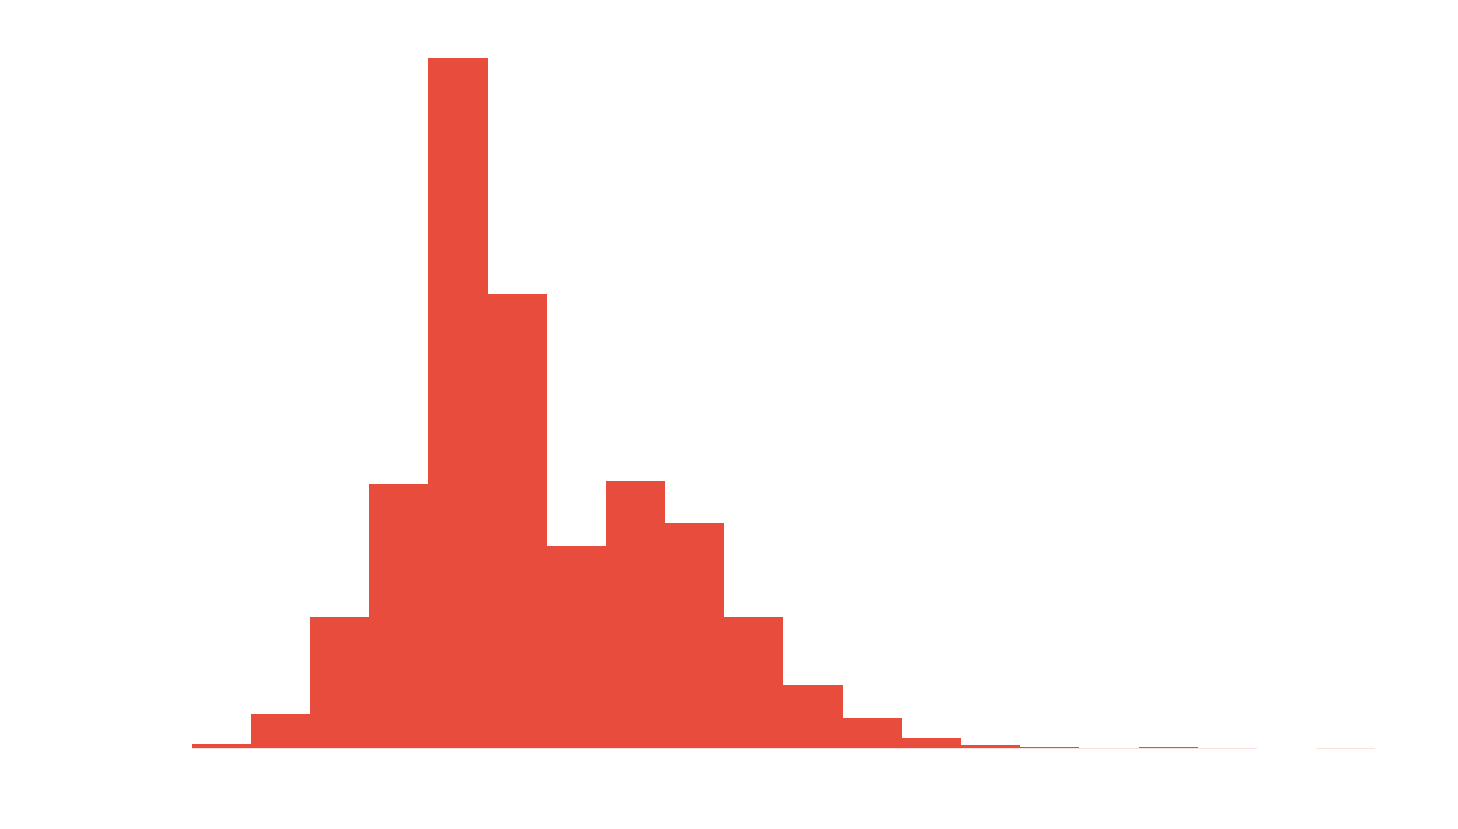

In [10]:
import pandas as pd

data=np.loadtxt("dataset.txt")
plt.hist(data,bins=20)

Okay, so the first thing we can do is try and get some metrics for the center of the distribution. Much of this section may not be ground-breaking for those watching, so let's power through it.

# Measures of Centrality

### Mean

If we have a set of points N points denoted $x_i$, the mean is defined as

$$ \frac{1}{N} \sum_{i=1}^N x_i $$

A way to manually compute the mean is given by:

In [11]:
def get_mean(xs):
    summed=0
    for x in xs:
        summed+=x
    return summed/len(xs)
print(get_mean([3,5,2,6]))

4.0


In [12]:
mean=np.mean(data)
print(mean,data.mean(),np.average(data))

7.68805056 7.68805056 7.68805056


### Median

Sort all your data and take out the middle element. Thats your median. `[1,3,5,7,7]` has a median of `5`. Here's how we can manually find the median:

In [13]:
def get_median(xs):
    mid = len(xs) // 2
    if len(xs) % 2 == 1:
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid - 1:mid + 1])
print(get_median([7, 7, 3, 1, 4, 5]))


4.5


In [14]:
median=np.median(data)
print(median)

6.7325


(0.0, 20.0)

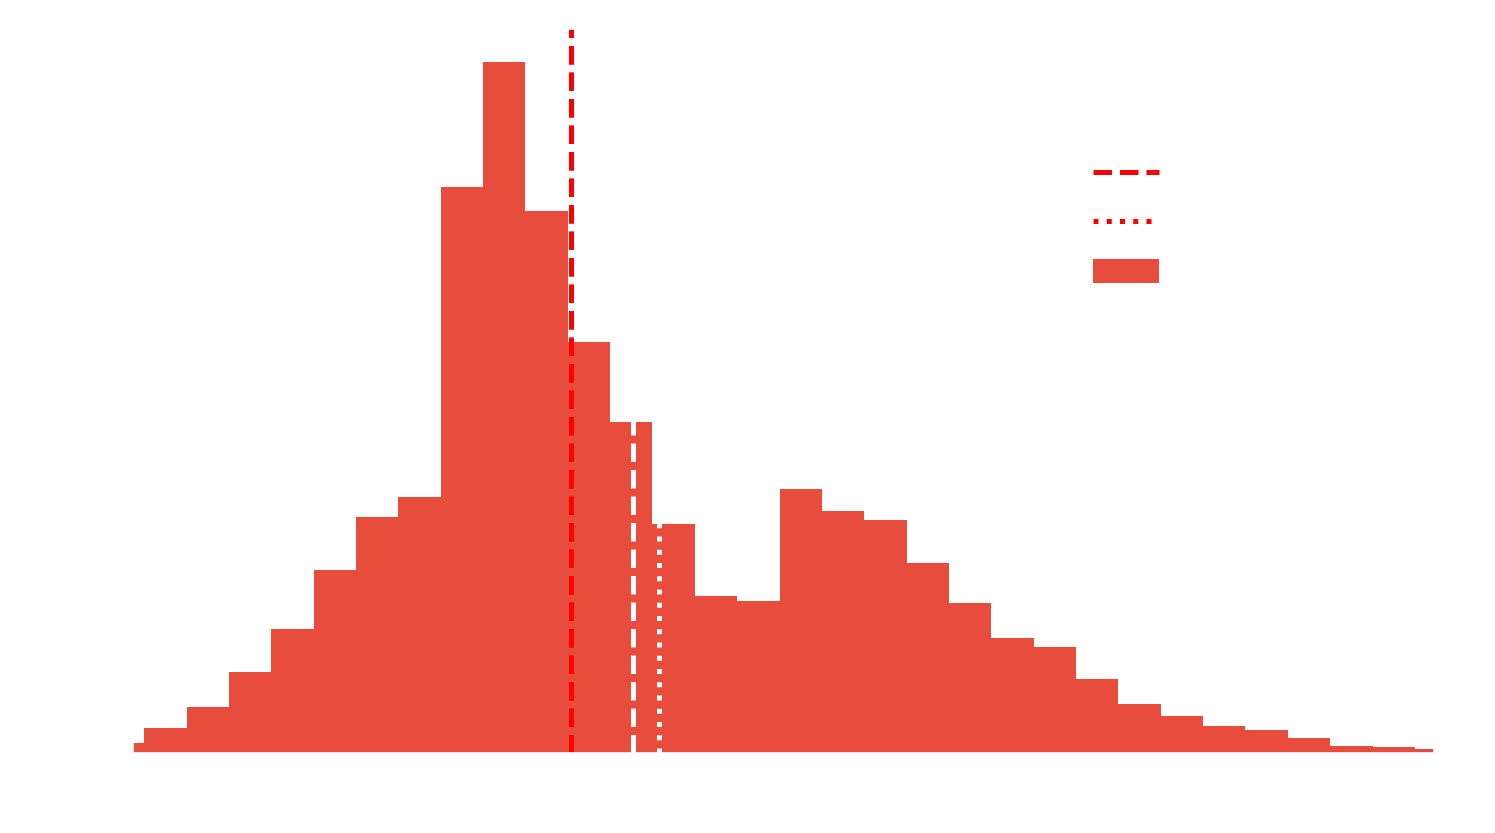

In [15]:
outlier=np.insert(data,0,5000)
plt.hist(data, label="Data")
plt.axvline(data.mean(), label="Data mean",ls="--")
plt.axvline(outlier.mean(), label="Outlier mean",ls=":")
plt.axvline(np.median(data), label="Data median",ls="--",c="r")
plt.axvline(np.median(outlier), label="Outlier mean",ls=":",c="r")
plt.legend()
plt.xlim(0,20)

### Mode

Another outlier insensitive method, it returns to us the value which is most common. **This works for discrete distributions only... sort of.** If you have a continuous distribution, you will need to bin the data first. For example, the mode of `[1,7,2,5,3,3,8,3,2]` is `3`, because three shows up more than any other number. Here is a manual mode function:

In [16]:
def get_mod(xs):
    value,count=np.unique(xs,return_counts=True)
    value_max_index=np.argmax(count)
    value_max=value[value_max_index]
    return value_max
get_mod(data)

5.519

In [17]:
mode=st.mode(data)

In [18]:
hist, edges=np.histogram(data, bins=100)
edges_center=(edges[1:]+edges[:-1])/2
mode=edges_center[np.argmax(hist)]
mode

5.223165

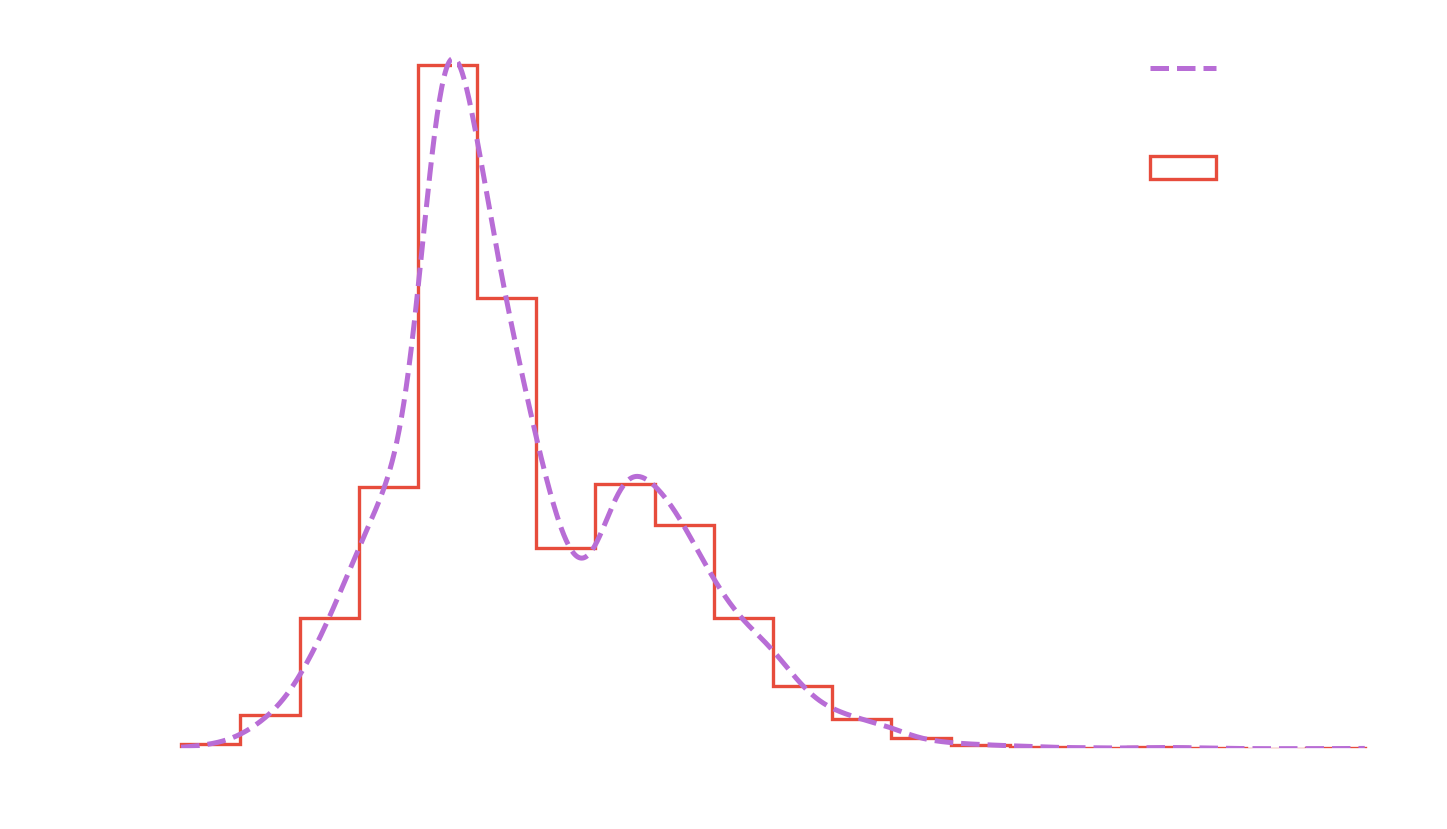

In [19]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.hist(data, bins=20, density=True, label="Data hist", histtype="step")
plt.plot(xvals, yvals, label="KDE")
plt.axvline(mode, label="Mode")
plt.legend();

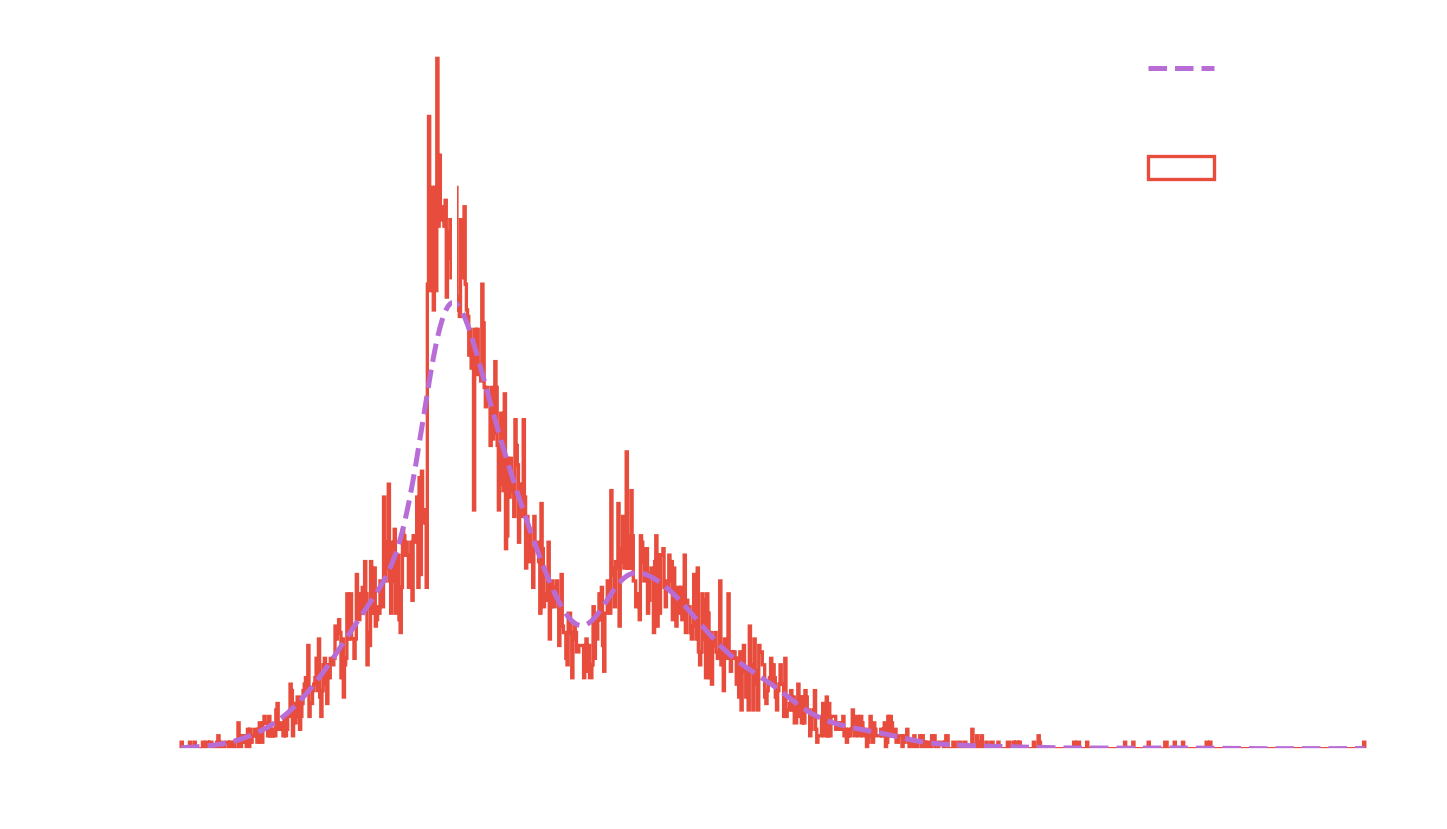

In [20]:
kde=st.gaussian_kde(data)
xvals=np.linspace(data.min(),data.max(),num=100000)
yvals=kde(xvals)
plt.hist(data,bins=1000,density=True,histtype="step",label="Data")
plt.plot(xvals,yvals,label="Gaussian")
plt.axvline(mode,label="Mode")
plt.legend()

# Comparison

Here is a comparison between mode, median and mean for the dataset:

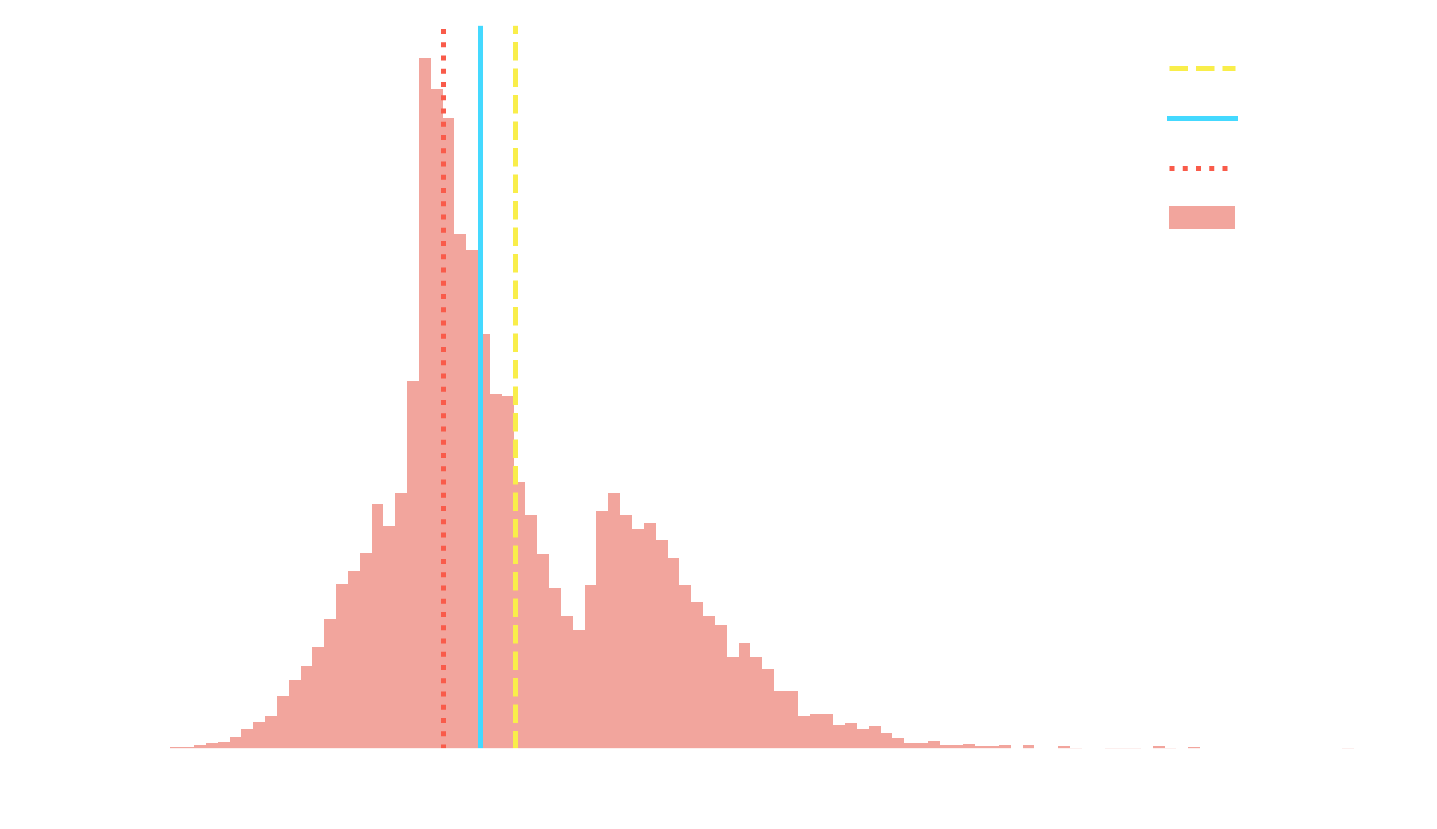

In [21]:
plt.hist(data, bins=100, label="Data", alpha=0.5)
plt.axvline(mean, label="Mean", ls="--", c='#f9ee4a')
plt.axvline(median, label="Median", ls="-", c='#44d9ff')
plt.axvline(mode, label="Mode", ls=":", c='#f95b4a')
plt.legend();

# Measures of width and balance

* Variance
* Standard deviation
* Skewness
* Kurtosis

### Variance

The variance of a distrbution is a measure of how much it spreads out around the mean. A touch more formally, its the expected value of the squared deviation from the mean. Even more formally, it is given by 

$$ Var = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2, $$

where $\mu$ is the mean of the dataset $x$, as described in the previous section. Note there is a fine point about whether you should divide by $N$ or $N-1$. Here is a manual way of calculating it:

In [66]:
def get_variance(xs):
    mean=np.mean(xs)
    summed=0
    for i in xs:   
        values=(i - mean)*(i - mean)
        summed += values
        
    return summed / (len(xs)-1)

### Standard deviation

This one is simple. Its the square root of the variance. So its the expected absolute value of the deviation from the mean. And we can use `np.std` for it or `pd.DataFrame.std` ([doco here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html))

In [75]:
std = np.std(data)
print(std, std**2)

3.6244414221454435 13.136575622563685


### Our powers combined

Welcome to the Gaussian approximation! Also known as a normal approximation. Check it out:

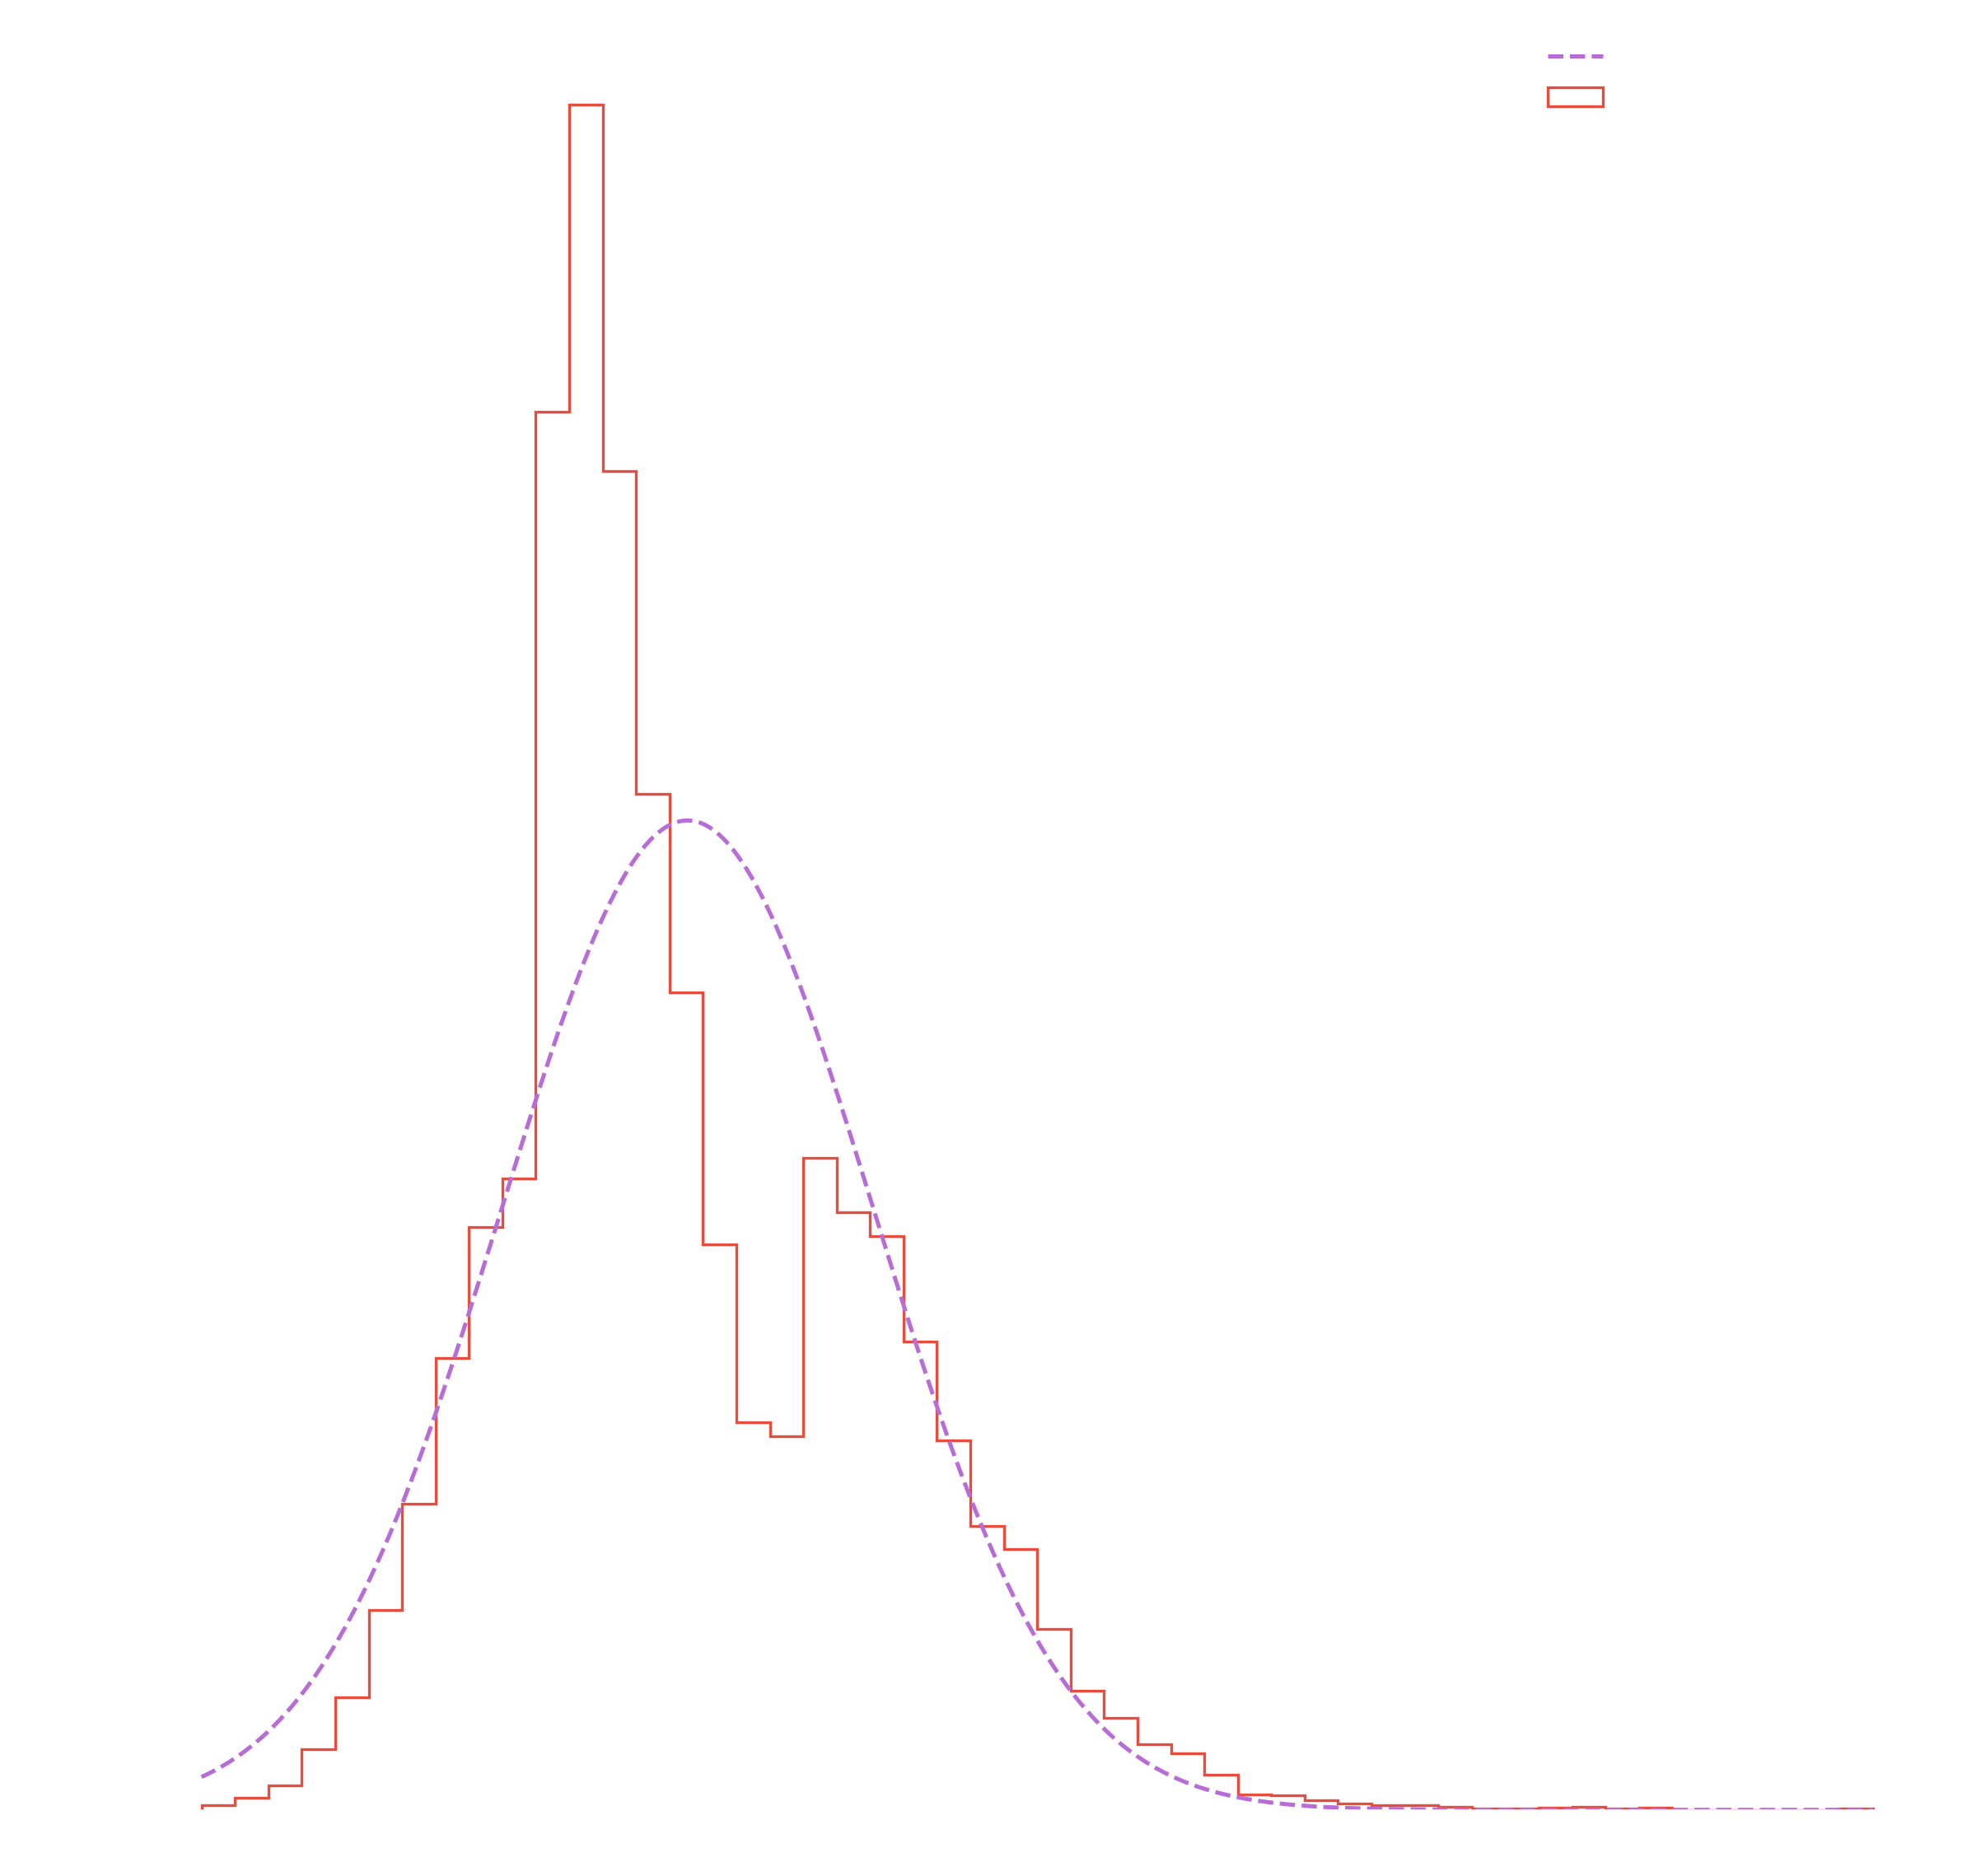

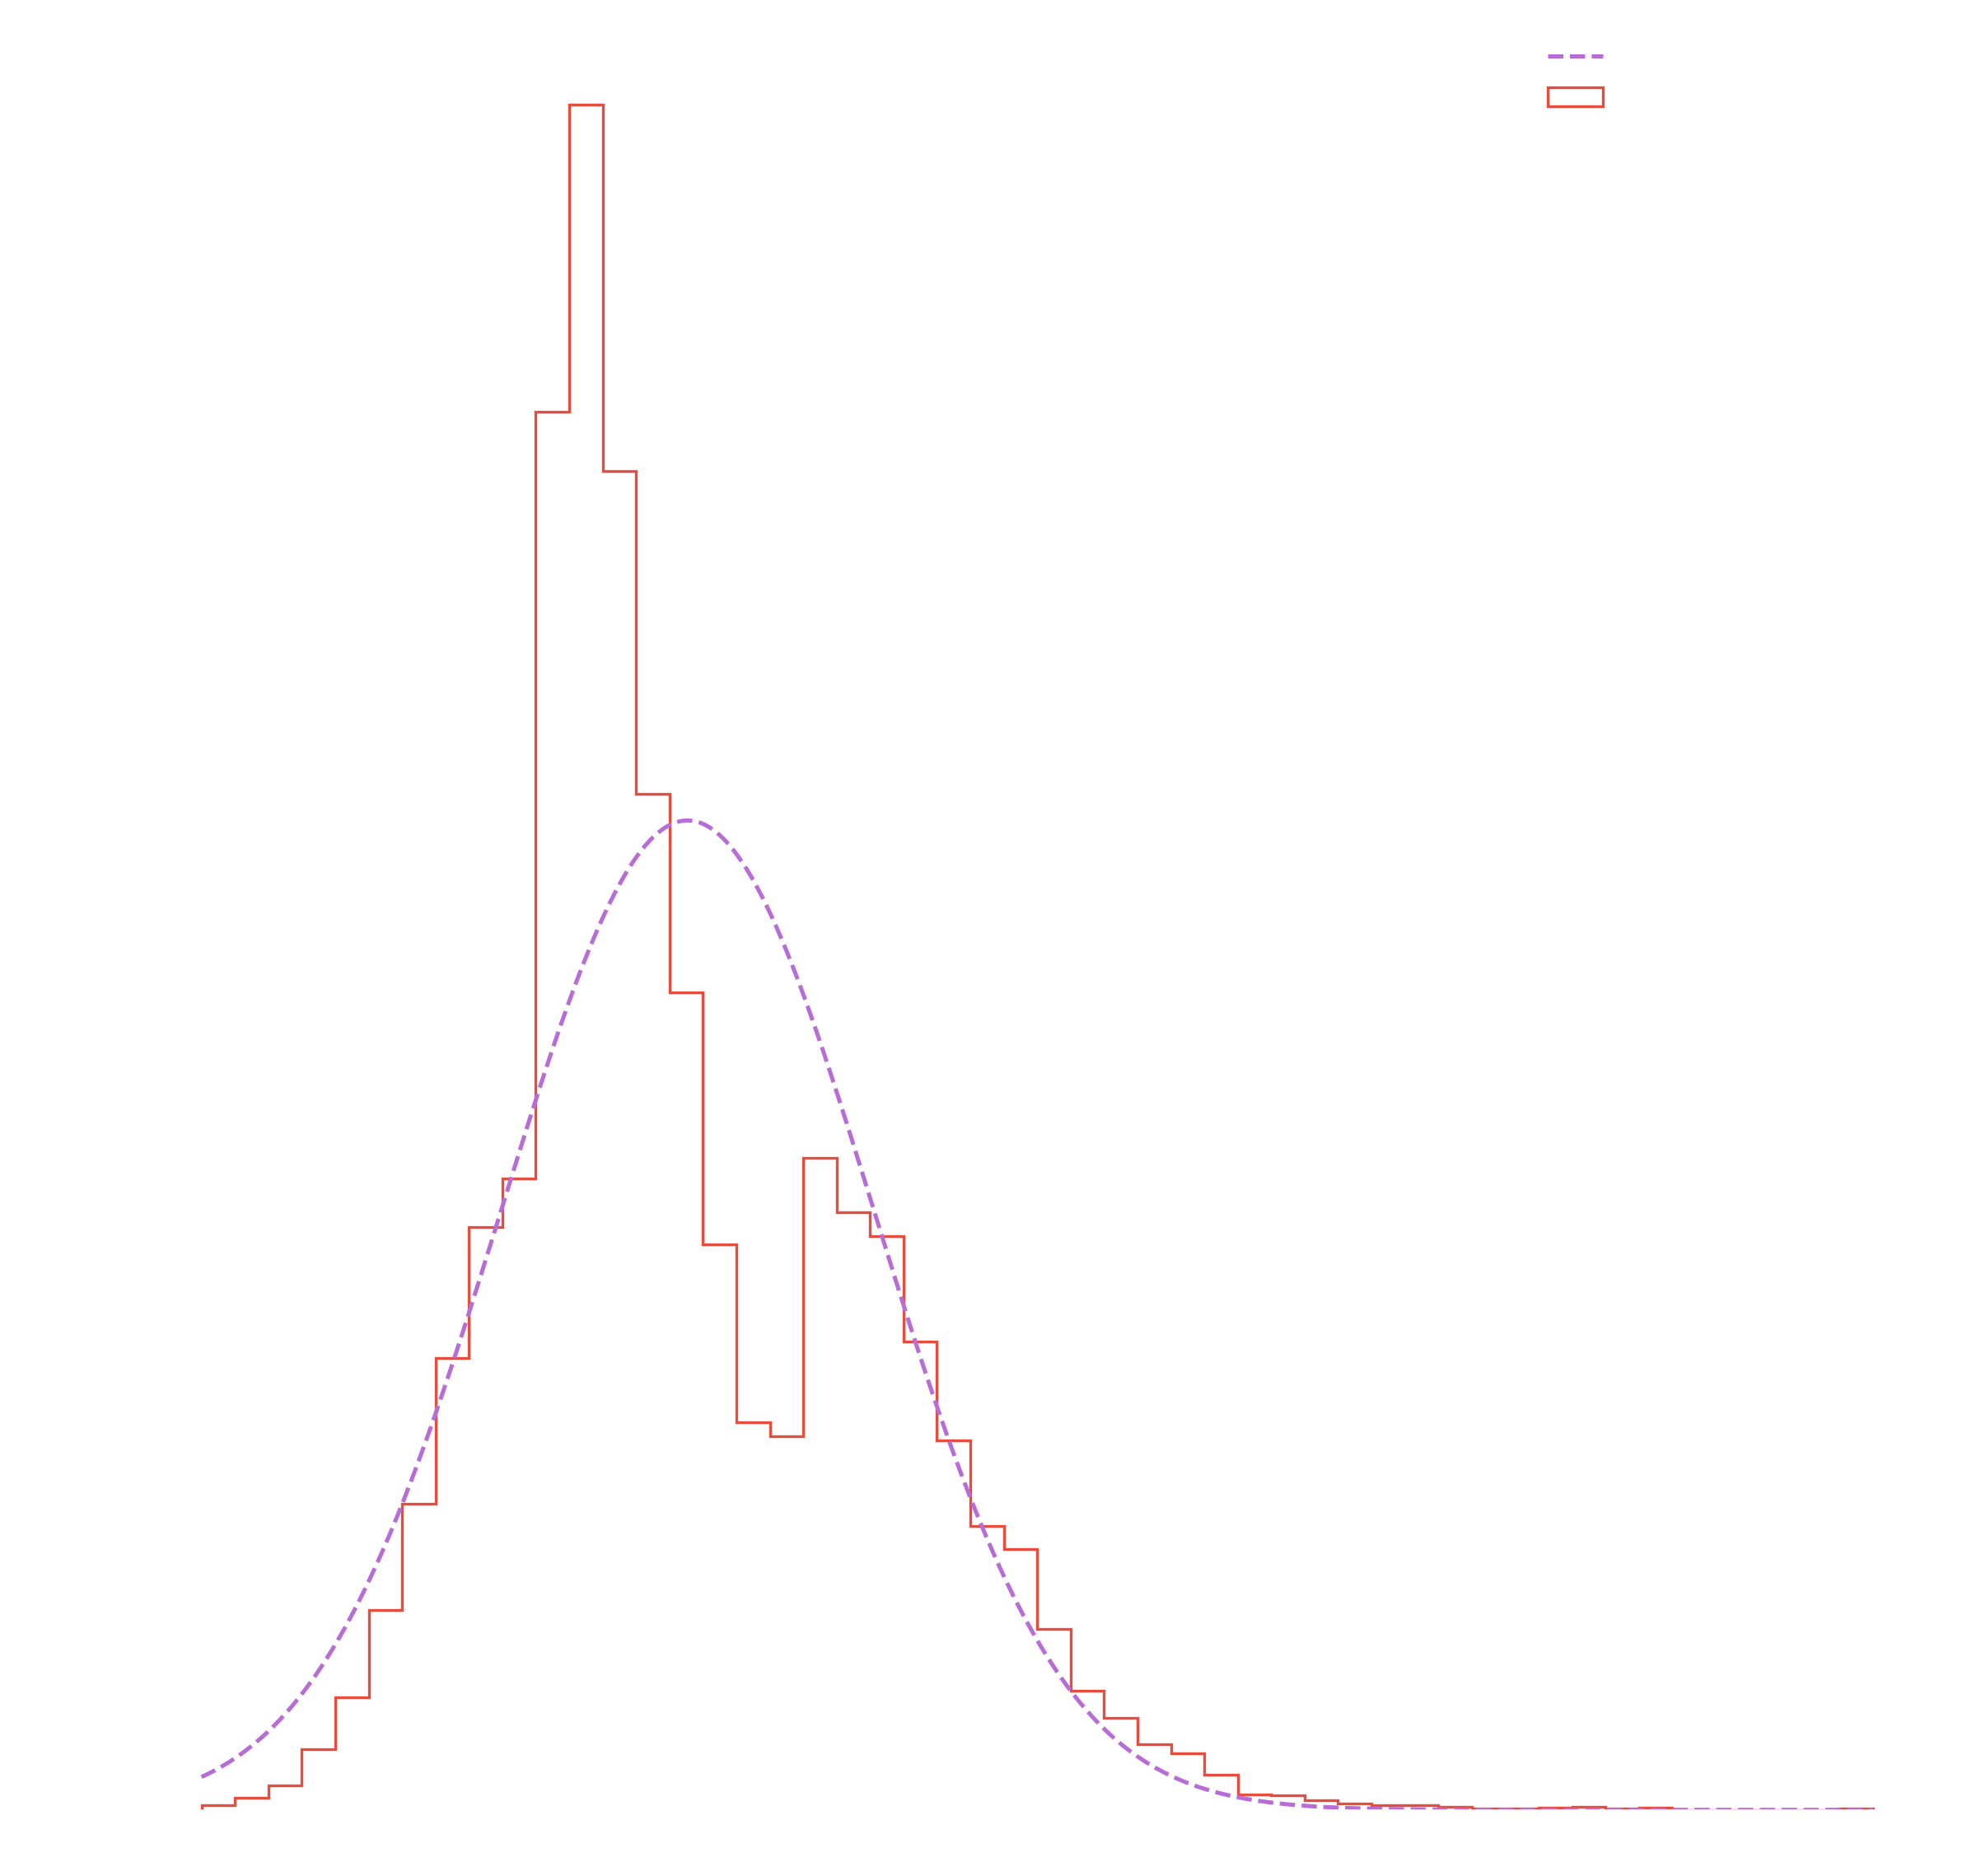

In [108]:
xs=np.linspace(data.min(),data.max(),num=1000)

ys=st.norm.pdf(xs,loc=mean,scale=std)

a=plt.figure(figsize=(12,12))
b=plt.hist(data,density=True,histtype="step",label="Real Data")
c=plt.plot(xs,ys,label="Normal approximation")
plt.legend()


a

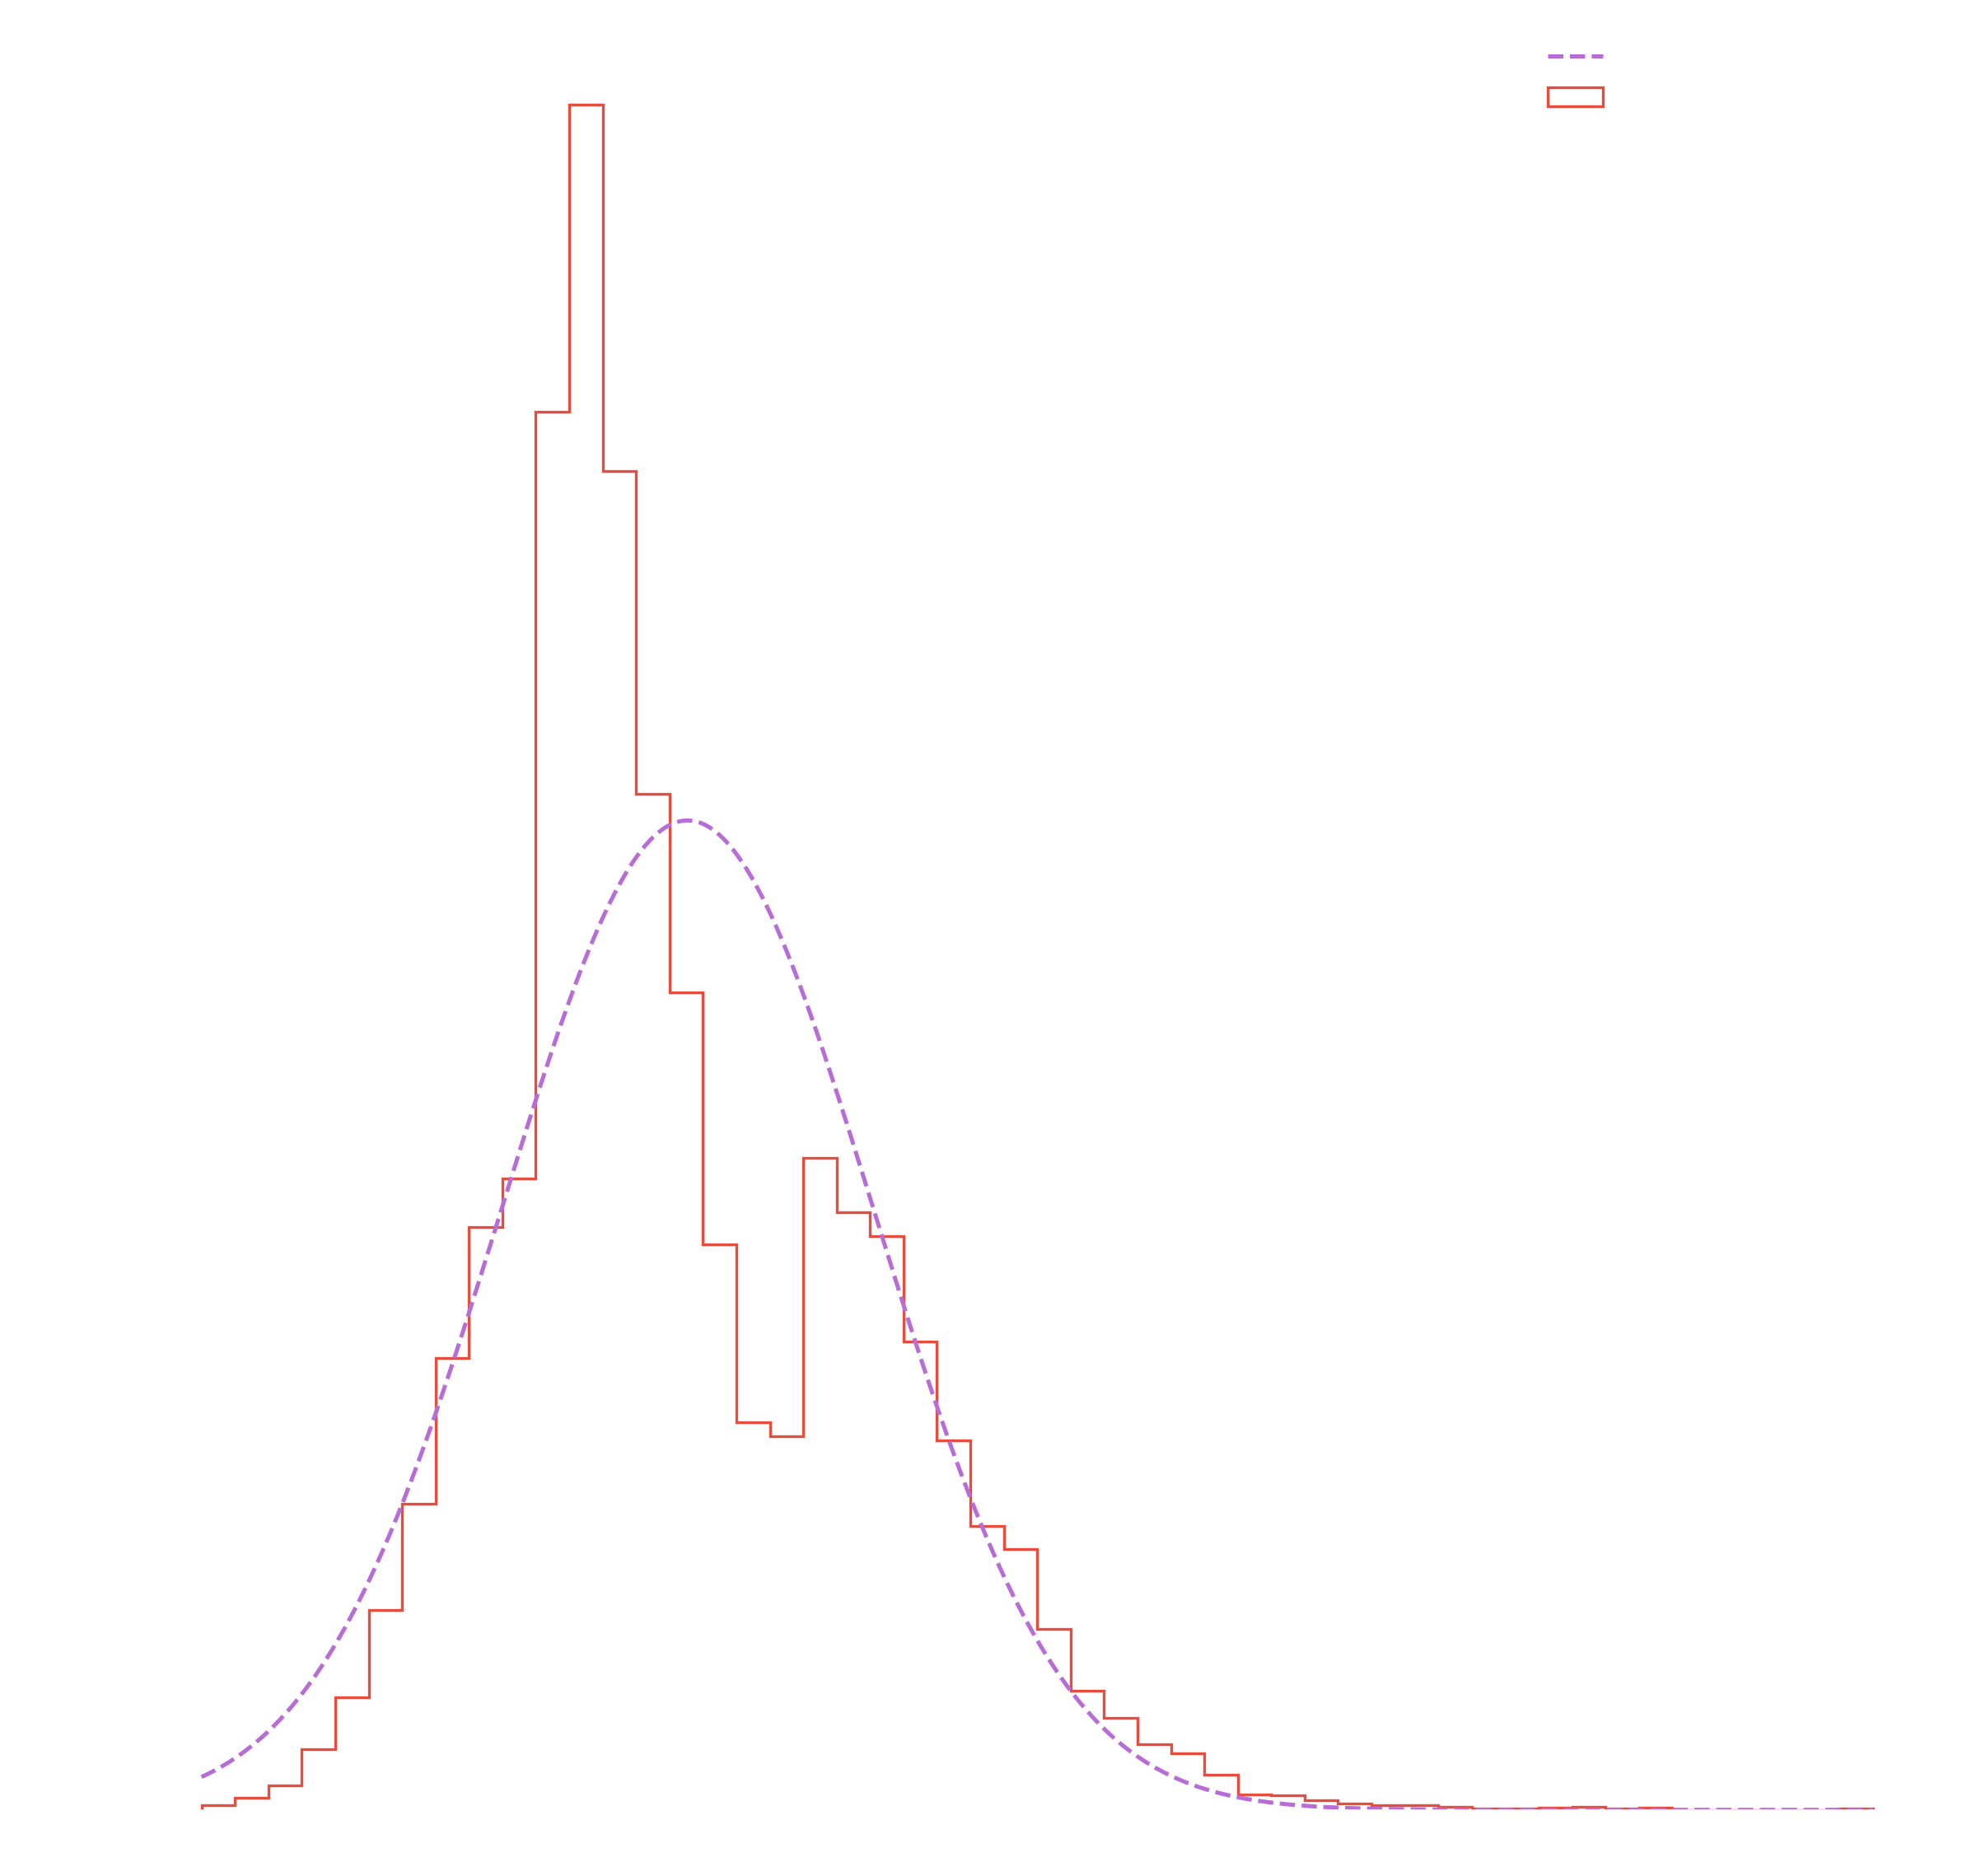

In [116]:
a

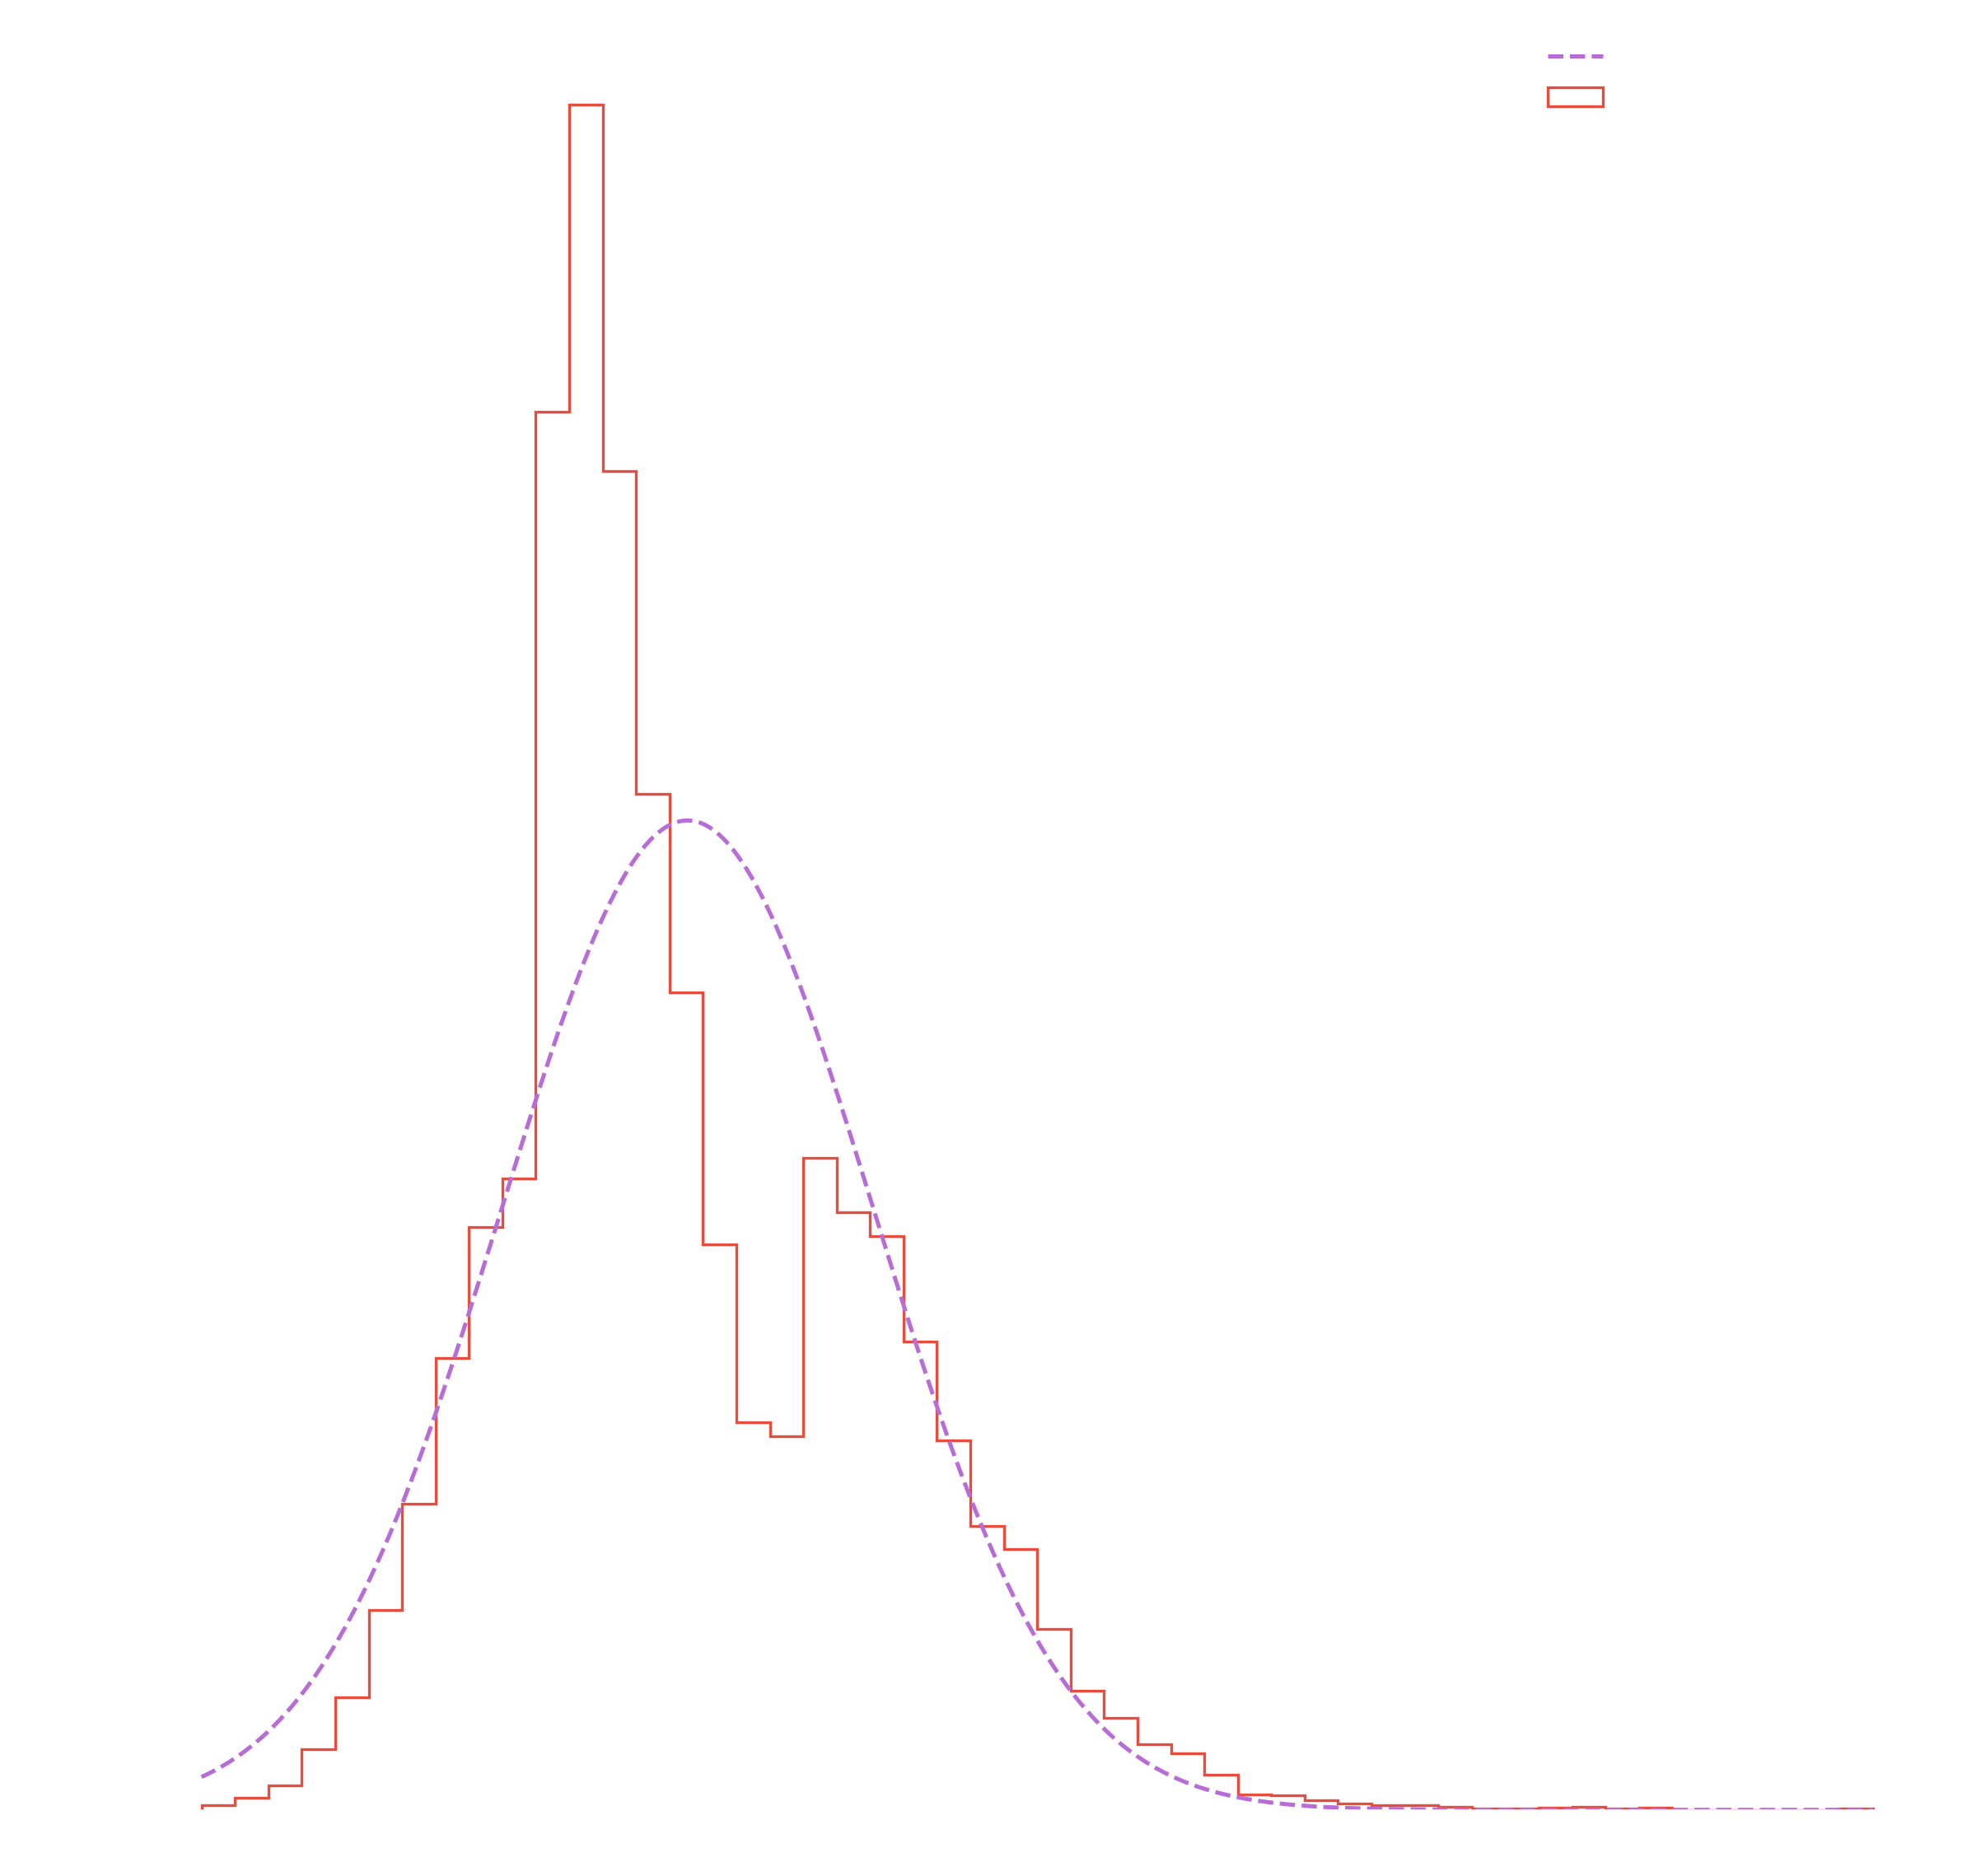

In [106]:
a